In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm


In [5]:
# Carregar dados do Excel
file_path = 'historico eNPS.xlsx'  # Atualize com o caminho do seu arquivo
df = pd.read_excel(file_path)
# Mostrar uma amostra dos dados
print(df.head())


  Instrumento      Meses  detractors  passives  promoters     eNPS
0        eNPS 2021-01-01   12.206000   28.6980  59.094000  46.8880
1        eNPS 2021-02-01   11.485000   28.5850  59.930000  48.4450
2        eNPS 2021-03-01   11.947500   27.2325  60.820000  48.8725
3        eNPS 2021-04-01   11.755000   24.3950  63.847500  52.0925
4        eNPS 2021-05-01   10.633333   22.9500  66.413333  55.7800


In [6]:
# Calcular correlação entre variáveis
corr_detratores, _ = pearsonr(df['detractors'], df['eNPS'])
corr_neutros, _ = pearsonr(df['passives'], df['eNPS'])
corr_promotores, _ = pearsonr(df['promoters'], df['eNPS'])
print(f"Correlação entre Detratores e eNPS: {corr_detratores}")
print(f"Correlação entre Neutros e eNPS: {corr_neutros}")
print(f"Correlação entre Promotores e eNPS: {corr_promotores}")


Correlação entre Detratores e eNPS: -0.9683226066393793
Correlação entre Neutros e eNPS: -0.7264972059686812
Correlação entre Promotores e eNPS: 0.9865189320666042


                            OLS Regression Results                            
Dep. Variable:                   eNPS   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.039e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           2.44e-62
Time:                        19:23:47   Log-Likelihood:                -3.0736
No. Observations:                  43   AIC:                             14.15
Df Residuals:                      39   BIC:                             21.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7467     15.014      0.050      0.9

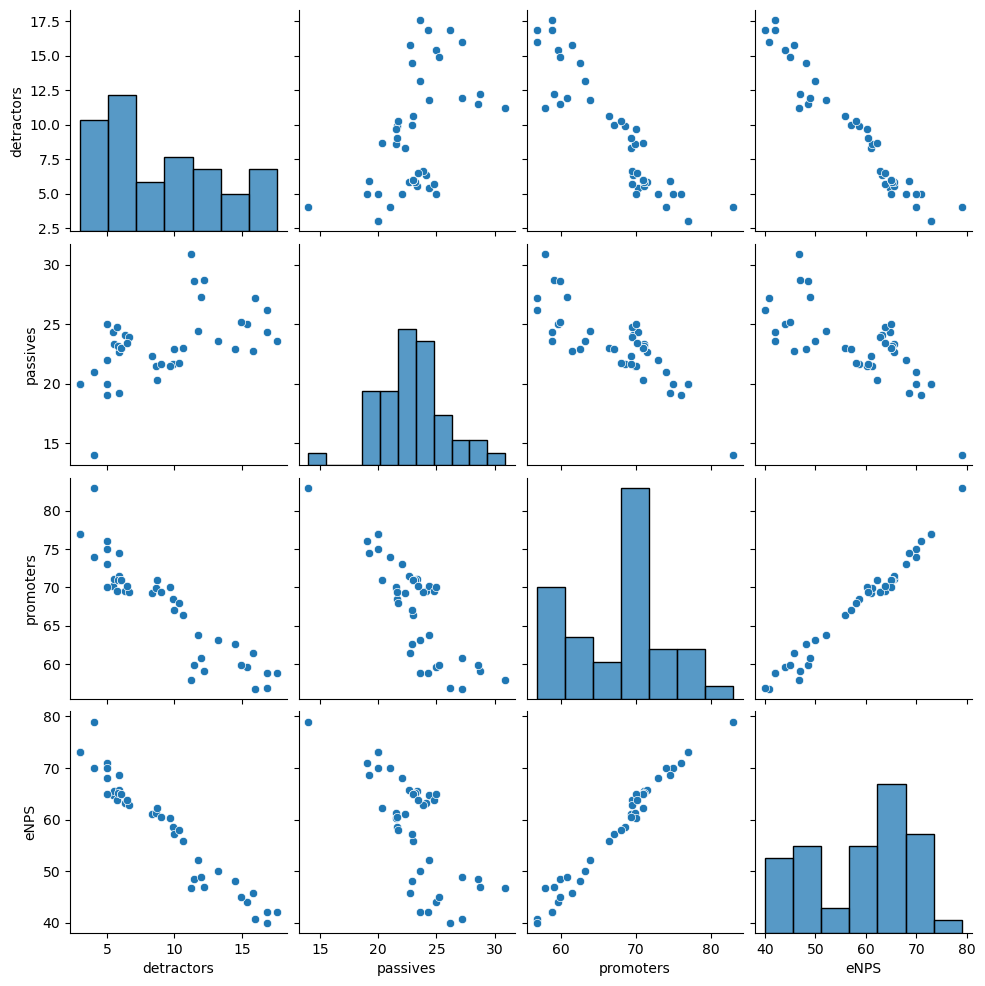

In [8]:
# Regressão linear múltipla
X = df[['detractors', 'passives', 'promoters']]
y = df['eNPS']
X = sm.add_constant(X)  # Adicionar intercepto
model = sm.OLS(y, X).fit()
print(model.summary())
# Visualização da correlação
sns.pairplot(df)
plt.show()

In [12]:
# Função para calcular eNPS
def calculate_enps(promoters, detractors, neutros):
    return promoters - detractors
# Valores base (média dos dados atuais)
mean_promoters = 66 # Substitua pelo valor real dos dados
mean_detractors = 11  # Substitua pelo valor real dos dados
mean_neutros = 23  # Substitua pelo valor real dos dados
# Cenários de sensibilidade
scenarios = {
    'Base': (mean_promoters, mean_detractors, mean_neutros),
    'Detratores +1%': (mean_promoters, mean_detractors + 1, mean_neutros - 1),
    'Neutros +1%': (mean_promoters - 1, mean_detractors, mean_neutros + 1),
    'Promotores +1%': (mean_promoters + 1, mean_detractors - 1, mean_neutros)
}
# Calculando eNPS para cada cenário
results = {k: calculate_enps(*v) for k, v in scenarios.items()}
print(results)

{'Base': 55, 'Detratores +1%': 54, 'Neutros +1%': 54, 'Promotores +1%': 57}
